In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df  =pd.read_csv("/content/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [ ]:
df.shape

(214, 10)

In [ ]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# summary statistics of data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# checking missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


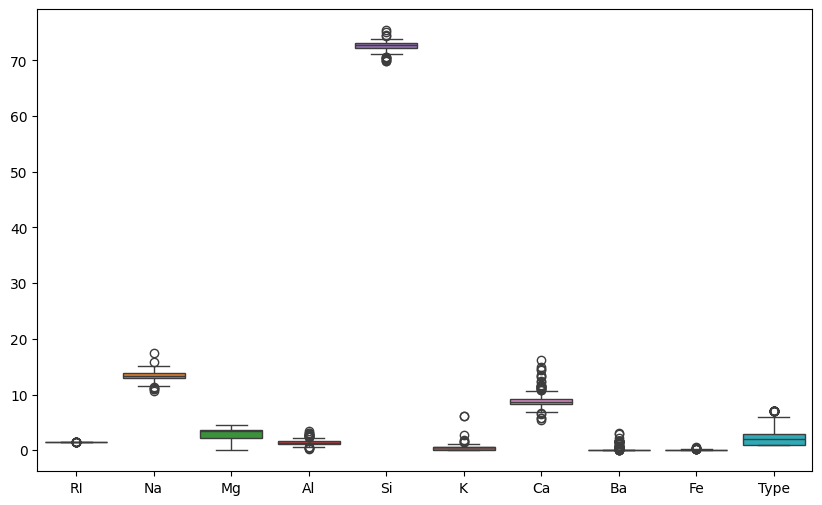

In [ ]:
# boxplot visualization for outliers
plt.figure(figsize = (10,6))
sns.boxplot(data = df)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# fit isolation forest to identify outliers
iso_forest = IsolationForest(contamination = 0.05, random_state = 42)
outliers = iso_forest.fit_predict(df)
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
df['outlier'] = outliers
df['outlier'].value_counts()

,count
outlier,
1,203
-1,11


In [ ]:
# Drop the 'outlier' column if not needed anymore
df = df.drop(columns=['outlier'])

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
# check for inconsistence in the data
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


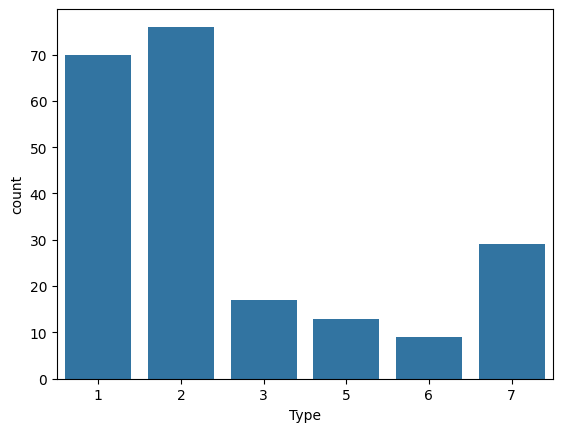

In [ ]:
sns.countplot(x='Type', data=df)
plt.show()

#Data Visualization:

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

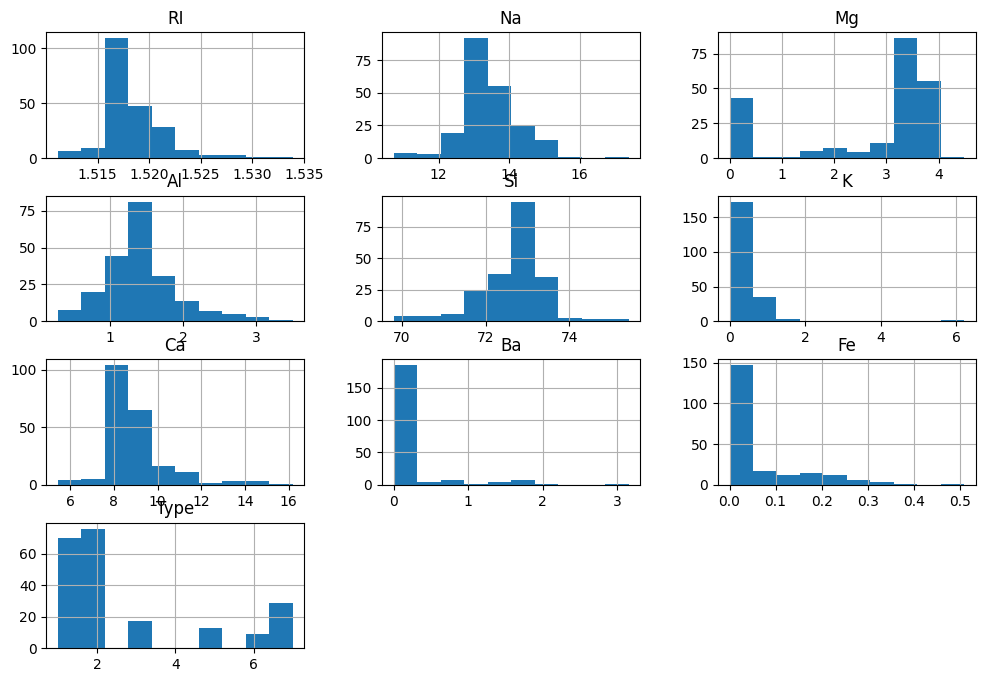

In [ ]:
df.hist(figsize=(12,8))


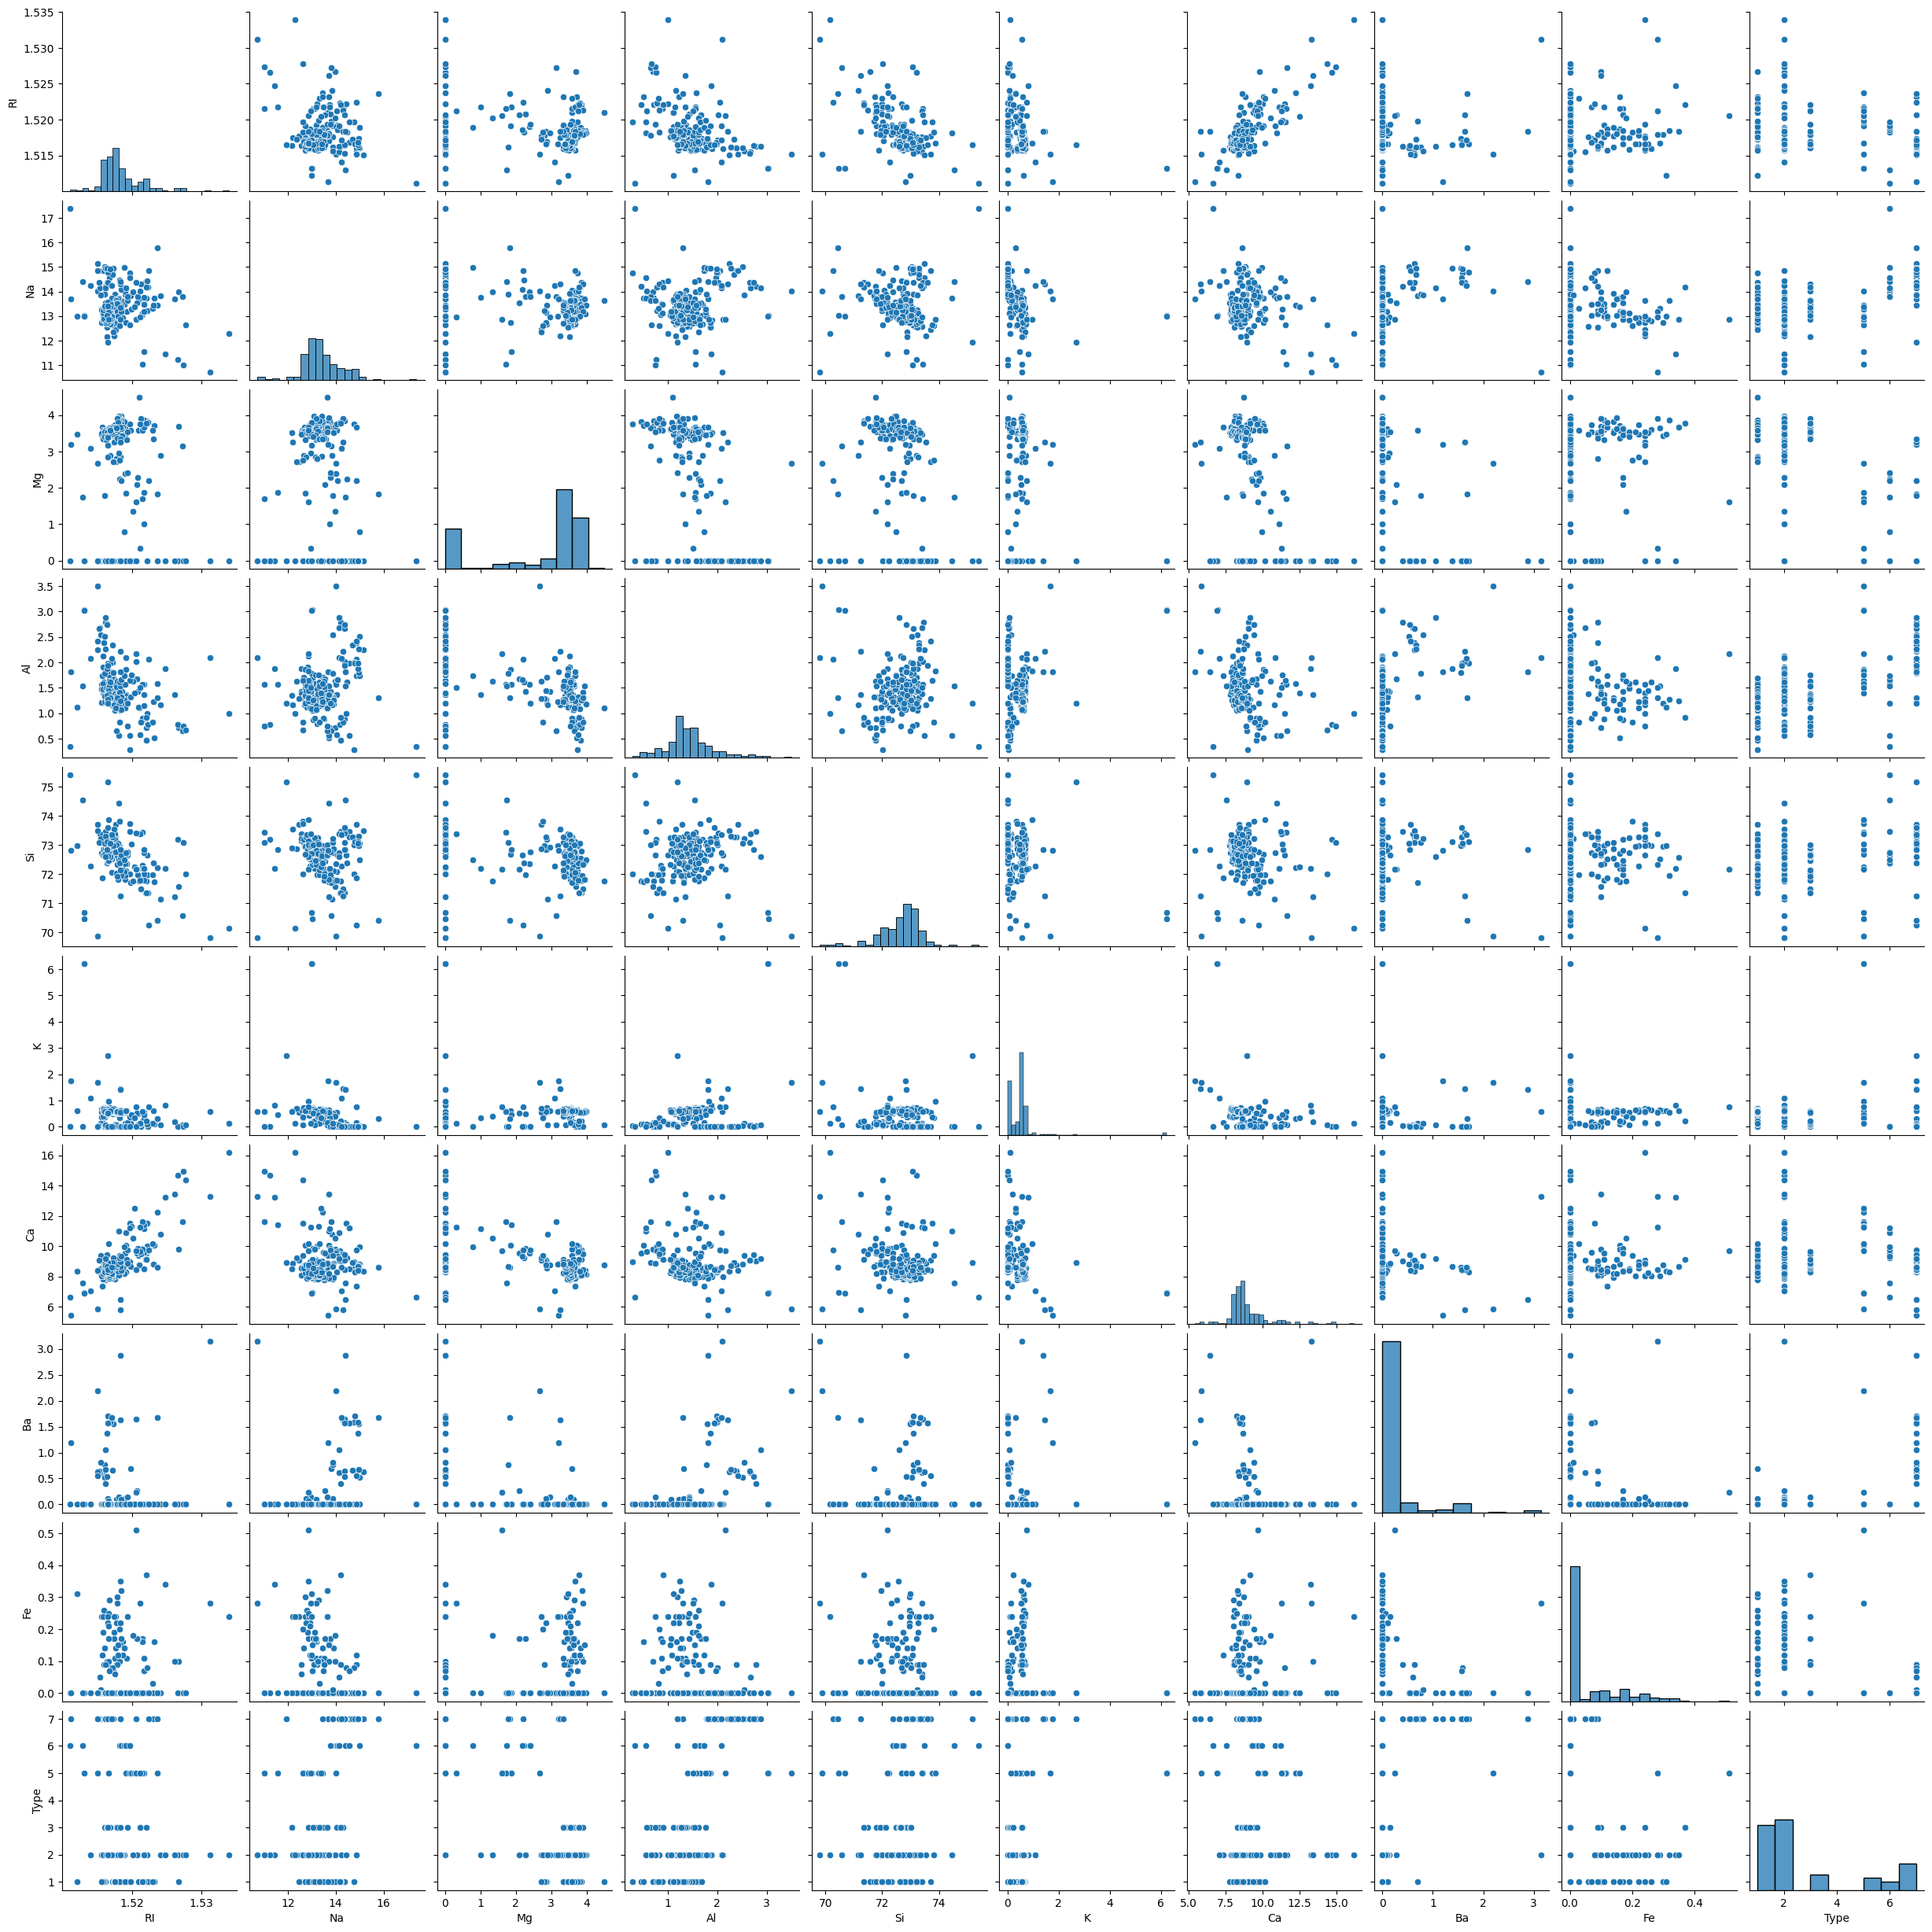

In [ ]:
sns.pairplot(data = df)

In [ ]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


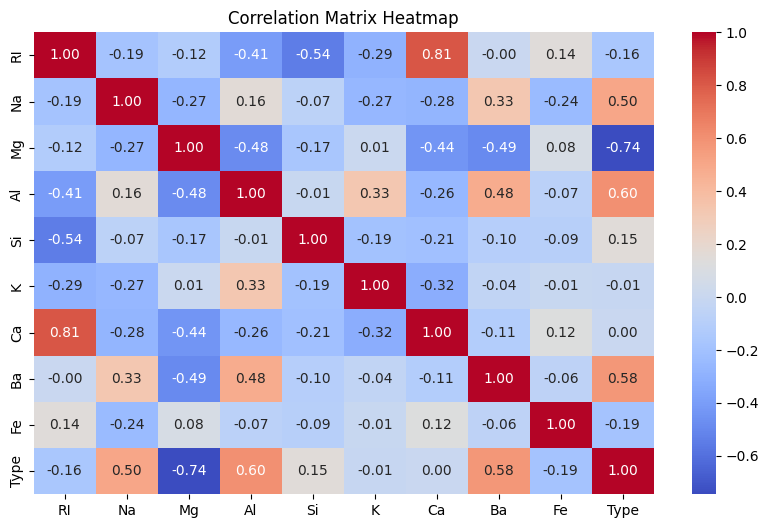

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot =True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#Data Preprocessing:

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaler = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
std_scaler

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [ ]:
X= df.drop(columns = ['Type'])
y = df['Type']

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


#Random Forest Implementation

In [ ]:
# Divide the data into train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [ ]:
# implement a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=32, n_estimators=50, max_features = 3, n_jobs = -1, max_depth =5)
# train the model
rfc = model.fit(X_train, y_train)
rfc

# random_state=32 ->ensures that the random number used by the model
# n_estimators=50->specifies the number of trees in the forest, & the model have 50 decision tree
# max_features=3-> consider maimum no of features is 3 for each tree when looking for the best split.
# n_jobs=-1->speed up the process of the model.
# max_depth=5-> sets max depth of each tree to 5. it limits growth of trees to avoid overfitting.

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=50, n_jobs=-1,
                       random_state=32)

In [ ]:
# test the model
y_pred = rfc.predict(X_test)
y_pred

array([2, 1, 2, 5, 5, 1, 2, 2, 7, 1, 1, 3, 1, 2, 2, 2, 1, 5, 7, 1, 1, 1,
       1, 2, 5, 7, 1, 2, 2, 5, 1, 2, 2, 1, 1, 2, 6, 2, 1, 1, 2, 2, 2])

In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classify_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


The accuracy of the model performance is 72%

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.71      0.71      0.71        17
           3       1.00      0.25      0.40         4
           5       0.60      1.00      0.75         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.72        43
   macro avg       0.83      0.68      0.69        43
weighted avg       0.76      0.72      0.71        43



# Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [ ]:
# Bagging Method
from sklearn.ensemble import BaggingClassifier

Bagging_model = BaggingClassifier(estimator = rfc, n_estimators = 100, random_state=42)


In [ ]:
# fit the bagging model to the training data
Bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5, max_features=3,
                                                   n_estimators=50, n_jobs=-1,
                                                   random_state=32),
                  n_estimators=100, random_state=42)

In [ ]:
# prediction on the test data
y_pred_bagging = Bagging_model.predict(X_test)
y_pred_bagging

array([2, 1, 1, 5, 2, 1, 2, 2, 7, 1, 1, 2, 1, 2, 2, 2, 1, 2, 7, 1, 1, 1,
       1, 2, 5, 7, 1, 2, 1, 5, 1, 2, 2, 1, 1, 2, 6, 2, 1, 1, 2, 2, 2])

In [ ]:
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.7209302325581395


In [ ]:
print("Bagging Clssification Report:")
print(classification_report(y_test, y_pred_bagging))

Bagging Clssification Report:
              precision    recall  f1-score   support

           1       0.67      0.92      0.77        13
           2       0.72      0.76      0.74        17
           3       0.00      0.00      0.00         4
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.72        43
   macro avg       0.68      0.60      0.62        43
weighted avg       0.67      0.72      0.68        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Boosting method
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(estimator = rfc, n_estimators = 100, random_state = 42)


In [ ]:
# fit the adaboost model to the training data
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5, max_features=3,
                                                    n_estimators=50, n_jobs=-1,
                                                    random_state=32),
                   n_estimators=100, random_state=42)

In [ ]:
# prediction on the test data
y_pred_boosting = adaboost_model.predict(X_test)
y_pred_boosting

array([2, 1, 2, 5, 5, 3, 2, 2, 7, 1, 2, 2, 1, 2, 2, 2, 1, 2, 7, 1, 1, 1,
       1, 2, 5, 7, 1, 2, 1, 5, 1, 2, 2, 1, 1, 2, 6, 2, 1, 1, 2, 2, 2])

In [ ]:
print("Adabbost Classifier Accuracy:", accuracy_score(y_test, y_pred_boosting))

Adabbost Classifier Accuracy: 0.7441860465116279


In [ ]:
print("Adaboost Classification Report:")
print(classification_report(y_test, y_pred_boosting))

Adaboost Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.74      0.82      0.78        17
           3       0.00      0.00      0.00         4
           5       0.75      1.00      0.86         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.74        43
   macro avg       0.70      0.65      0.66        43
weighted avg       0.70      0.74      0.72        43



Random Forest and Bagging achieve the same accuracy(72%) but different in characterstics.Also random Forest shows slightly better precision and f1-score.


Adaboost acieves the highest accuracy(74%) and strong performance for class5 & class7.

Random Forest: An ensemble of decision trees,reduces variance and handles large datasets.

Bagging: It is similar to random forest reduces variances by averaging multiple models.

AdaBoost: focuses on correcting errors of previous models. Reduces variance and achieve higher accuracy.

#Interview Questions:

#1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging and boosting are ensemble learning techniques. Bagging (Bootstrap Aggregating) reduces variance by averaging multiple models, while boosting reduces bias by combining weak learners sequentially to form a strong learner.

#2. Explain how to handle imbalance in the data.
Techniques for handling imbalanced data:

1.Resampling techniques.

2.Data augmentation.

3.Synthetic minority over-sampling technique (SMOTE)

4.Ensemble techniques.

5.Evaluation metrics for imbalanced data.